In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
!pip install -U seaborn

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1 Загрузка данных

## 1.1 Посмотрим случайные строки

In [2]:
data = pd.read_csv('/kaggle/input/advanced-dls-spring-2021/train.csv')
data.sample(5)#пять случайных строк

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
559,3,50.4,137.25,Male,0,No,No,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),0
56,30,94.3,2679.7,Male,0,No,No,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),0
520,47,85.3,4107.25,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0
3459,71,19.6,1387.45,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),0
2006,18,54.4,957.1,Female,0,Yes,Yes,Yes,No,DSL,No,No,Yes,Yes,No,No,One year,Yes,Credit card (automatic),0


## 1.2 Обработаем пустые значения

In [3]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Видим,что TotalSpent определился как объект, тогда как должен быть float Преобразуем строки в числа предварительно удалив строки с пустым TotalSpent

In [4]:
data = data.replace(' ', np.nan).dropna()
data['TotalSpent'] = data['TotalSpent'].astype('float64') 
data.reset_index(drop= True , inplace= True ) #сбросим индексы
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5268,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5269,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5270,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5271,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [5]:
data.isna().sum().sum() #видим, что Nanов больше не осталось 

0

In [6]:
#списки с именами разных колонок

#числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

#категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

# 2 Анализ данных

## 2.1 Гистограмы и диаграмы

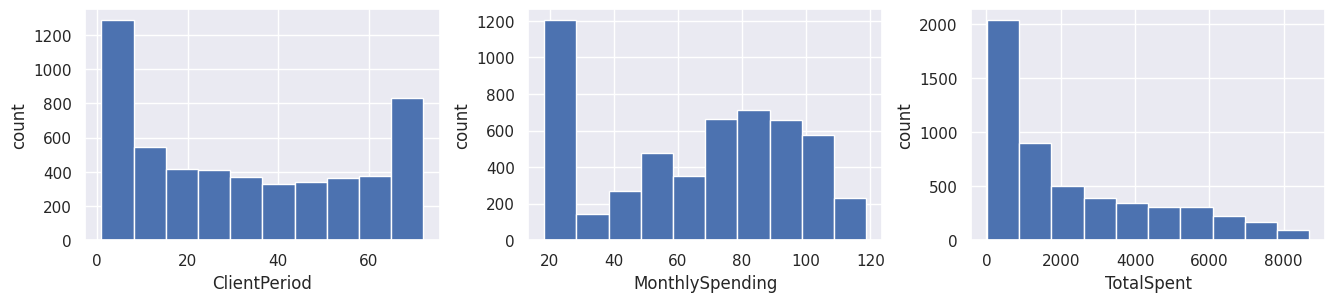

In [7]:
#гистограмы для численных признаков
fig = plt.figure(figsize=(16, 3))
fig.subplots_adjust(wspace=0.25)
for i in range(1, 4):
  ax = fig.add_subplot(1, 3, i)
  ax.hist(data[num_cols[i-1]])
  plt.ylabel('count')
  plt.xlabel(f'{num_cols[i-1]}')

<AxesSubplot: >

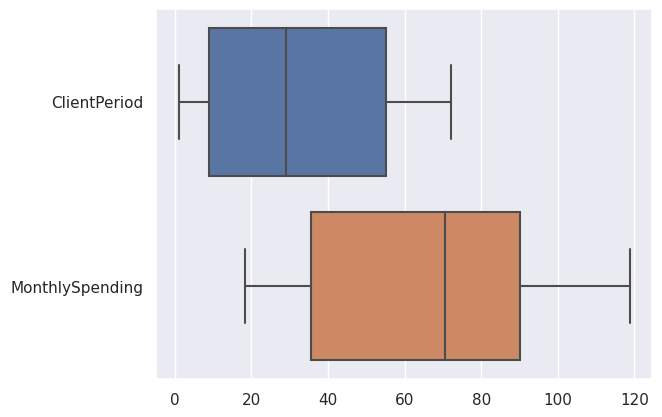

In [8]:
#боксплот для численных признаков (крое total_spent)
sns.boxplot(data=data[num_cols[:2]], orient="h")

In [9]:
#посмотрим какие значения есть в каждом из категориальных признаков 
for col in cat_cols:
  print(data[f'{col}'].value_counts())
  print()

Male      2651
Female    2622
Name: Sex, dtype: int64

0    4431
1     842
Name: IsSeniorCitizen, dtype: int64

No     2704
Yes    2569
Name: HasPartner, dtype: int64

No     3676
Yes    1597
Name: HasChild, dtype: int64

Yes    4754
No      519
Name: HasPhoneService, dtype: int64

No                  2508
Yes                 2246
No phone service     519
Name: HasMultiplePhoneNumbers, dtype: int64

Fiber optic    2341
DSL            1795
No             1137
Name: HasInternetService, dtype: int64

No                     2611
Yes                    1525
No internet service    1137
Name: HasOnlineSecurityService, dtype: int64

No                     2331
Yes                    1805
No internet service    1137
Name: HasOnlineBackup, dtype: int64

No                     2316
Yes                    1820
No internet service    1137
Name: HasDeviceProtection, dtype: int64

No                     2603
Yes                    1533
No internet service    1137
Name: HasTechSupportAccess, dtype: in

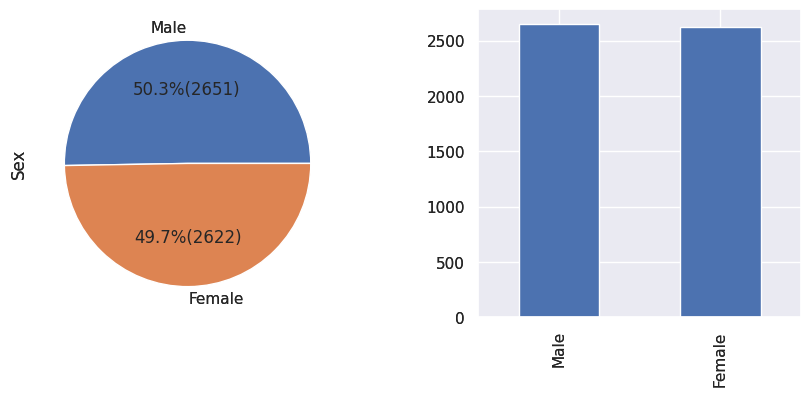

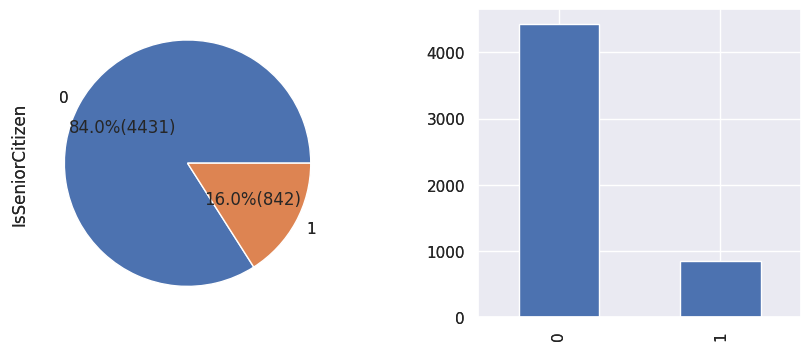

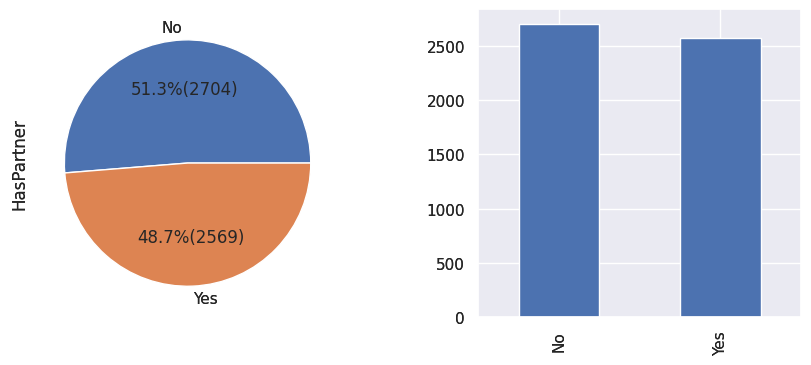

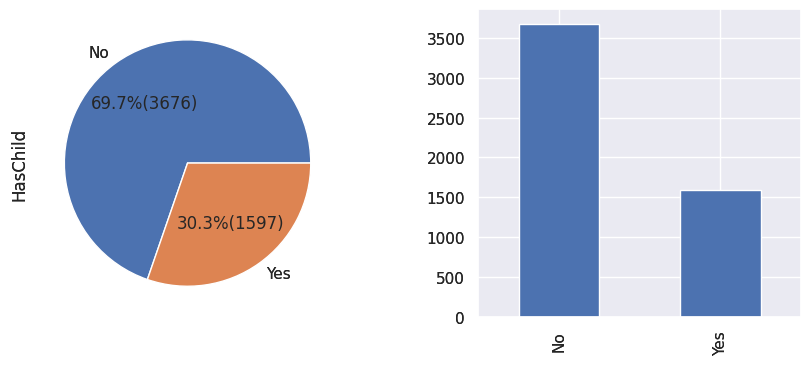

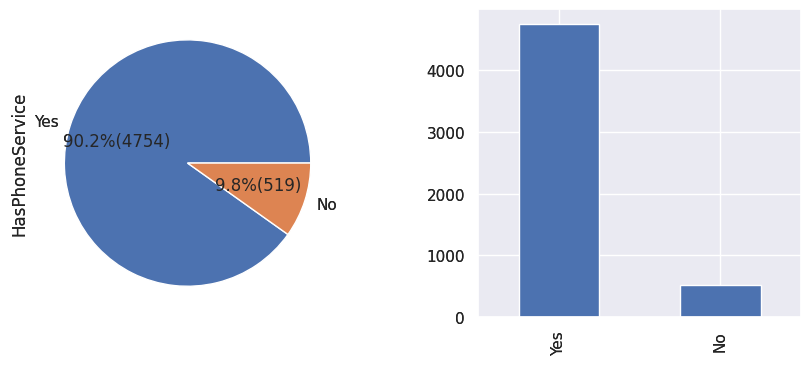

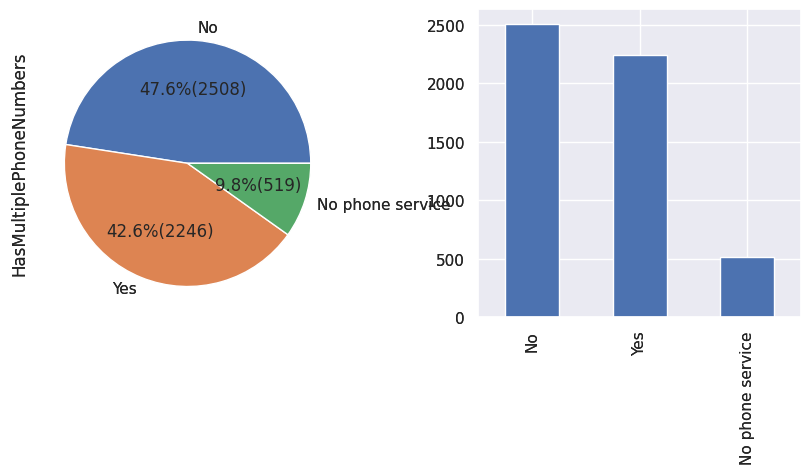

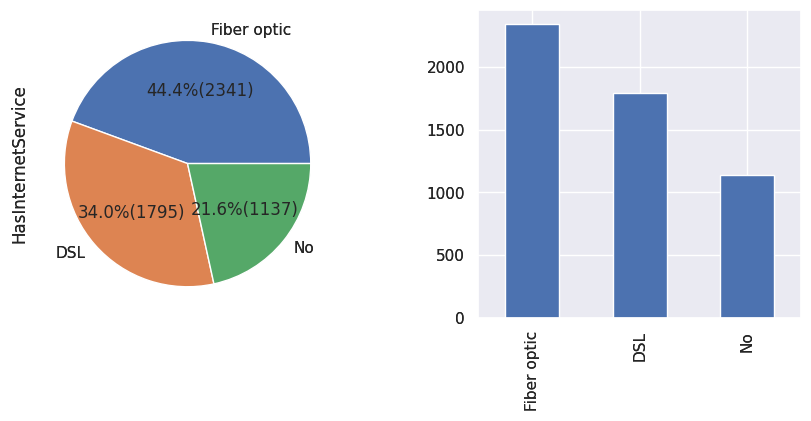

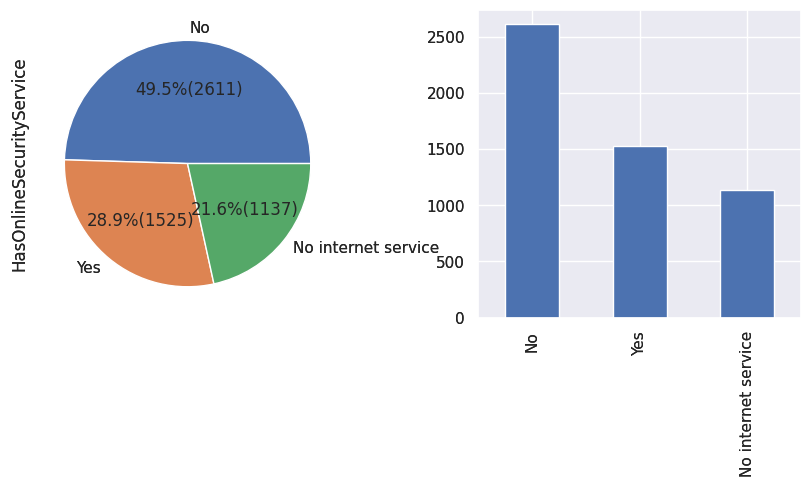

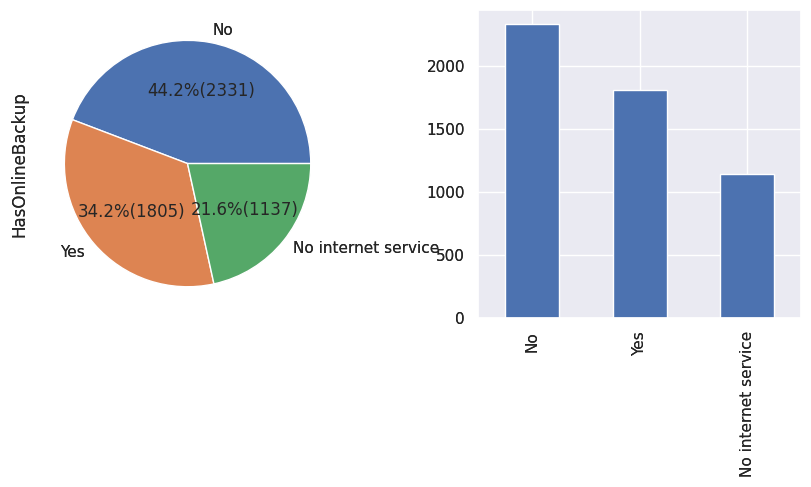

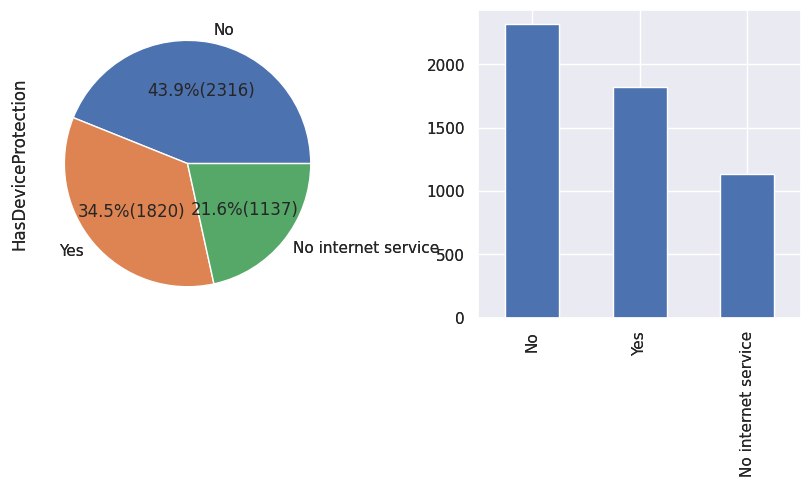

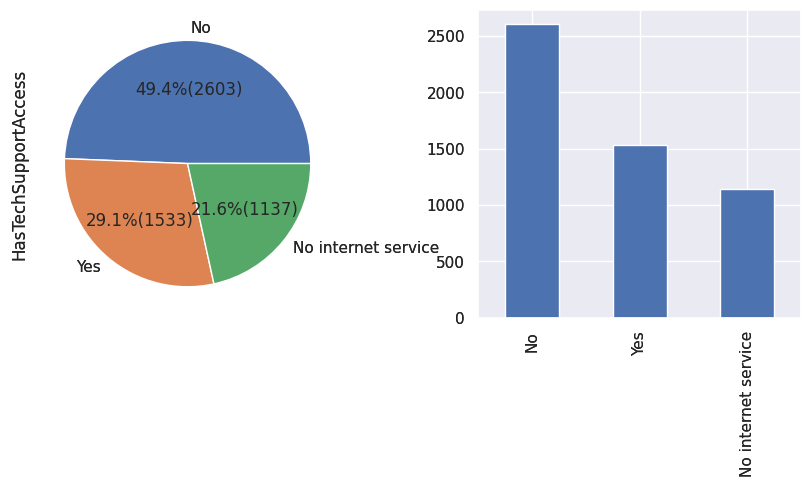

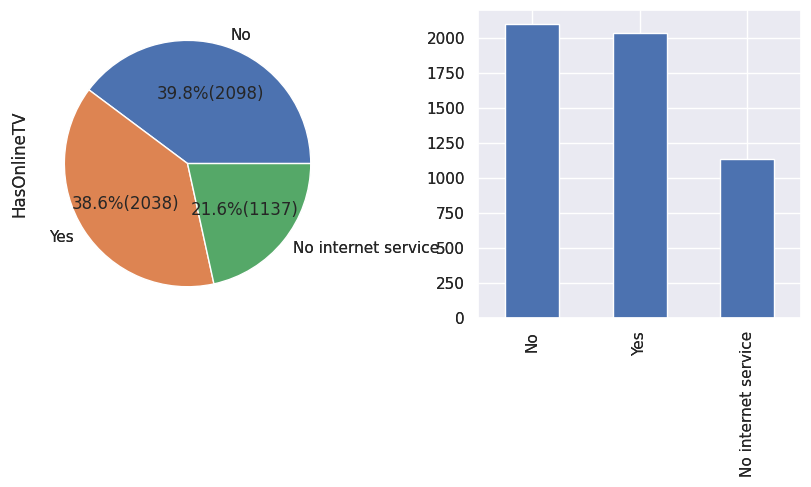

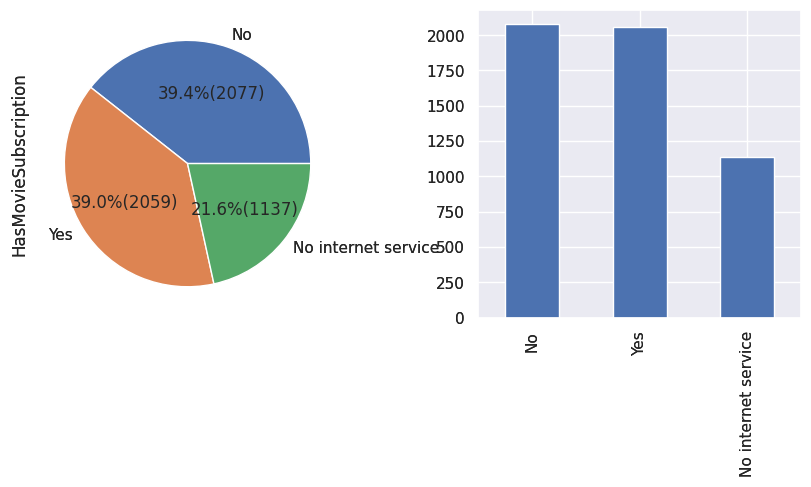

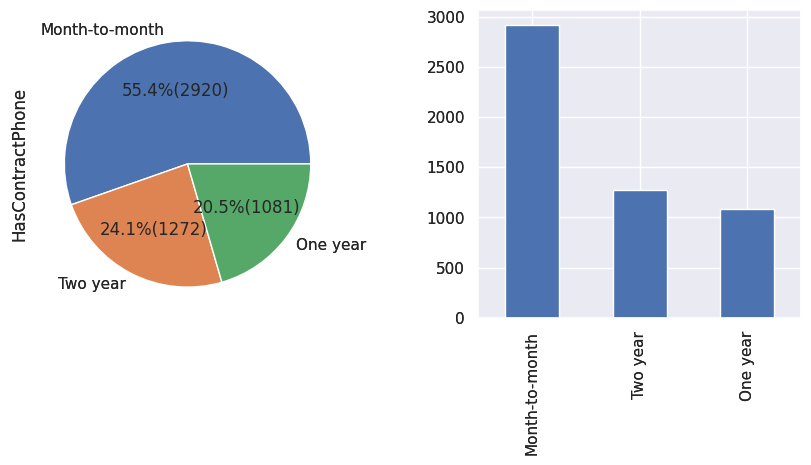

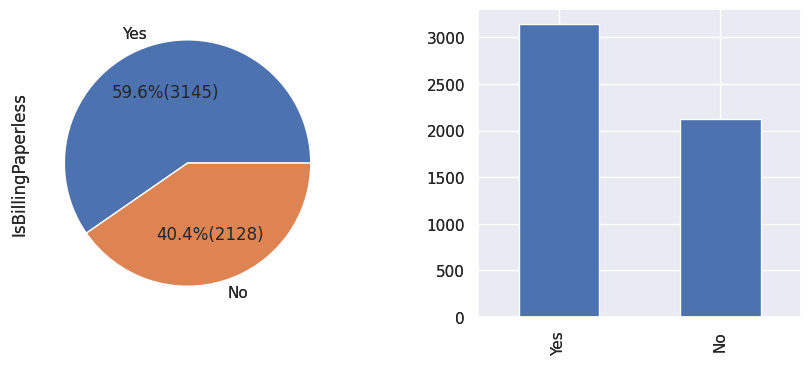

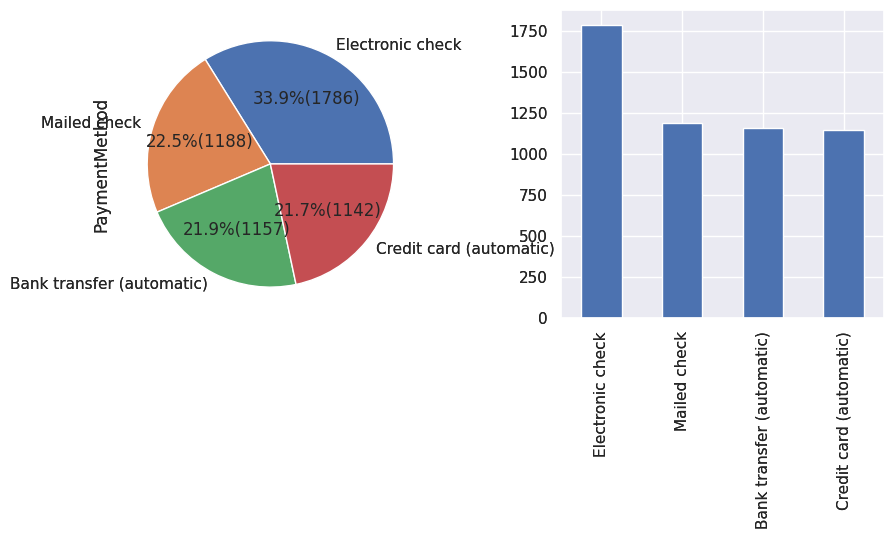

In [10]:
#диаграмы для категориальных признаков
for col in cat_cols:
  fig = plt.figure(figsize=(10,4))
  fig.subplots_adjust(hspace=0.4, wspace=0.4)
  for i in range(2):
    fig.add_subplot(1,2, 1)
    cols = data[col].value_counts()
    cols.plot(kind='pie', autopct=lambda p: '{:.1f}%({:.0f})'.format(p,(p/100)*cols.sum()))
    fig.add_subplot(1,2, 2)
    cols.plot(kind='bar')

## 2.2 Распределение целевой переменной

Распределение целевой переменной показывает, что оно несбалансировано с целевым классом 0, что значительно выше, чем 1, с приблизительным соотношением 2.5:1.

In [11]:
data[target_col].value_counts()

0    3889
1    1384
Name: Churn, dtype: int64

# 3 Применение линейных моделей

In [12]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score


## 3.1 Обработка данных

In [13]:
#отнормируем числовые признаки
scaler = StandardScaler()
scal_features = pd.DataFrame(scaler.fit_transform(data[num_cols]),columns=num_cols)

#закодируем категориальные признаки
dummy_features = pd.get_dummies(data[cat_cols])
X = pd.concat([scal_features, dummy_features], axis=1)
X

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.919099,-1.506436,-0.557582,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,1.612060,-1.295997,-0.184763,0,0,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
2,-1.282072,0.362658,-0.976504,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,-0.018437,0.475334,0.122800,1,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
4,1.122911,1.666716,1.968909,0,1,0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5268,-1.200547,-1.145210,-0.973749,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
5269,0.715287,-0.679594,-0.045372,0,0,1,0,1,1,0,...,0,0,1,0,0,1,1,0,0,0
5270,-1.282072,-0.328310,-0.985693,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
5271,-0.140724,0.365972,-0.033560,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0


## 3.2 Подбор гипераметра

### 3.2.1 Более лёгкий вариант
Разделим на train/valid и используем LogisticRegressionCV, который сам при вызове .fit() подберет параметр С. (scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).

In [14]:
#более лёгкий вариант
y = data[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
model_1 = LogisticRegressionCV(cv=5, random_state=0, scoring='roc_auc', refit=True).fit(X_train, y_train)
y_train_predicted = model_1.predict(X_train)
y_test_predicted = model_1.predict(X_test)
param = model_1.get_params()['Cs']#лучший C

In [15]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)
print(f'Качество на тестовой выборке: {test_auc :.4}, С={param}')

Качество на тестовой выборке: 0.7181, С=10


### 3.2.2 Более  сложный вариант
Используем кроссвалидацию. Соединим преобразования данных и LogisticRegression в один Pipeline с помощью make_pipeline. Затем передадим pipeline в GridSearchCV. 
Для one-hot-encoding'a сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора (LabelEncoder + OneHotEncoder)

In [ ]:
#более сложный вариант
model_2 = make_pipeline(#LabelEncoder(), 
                      #OneHotEncoder(),
                      LogisticRegression())
CV_model_2 = GridSearchCV(estimator=model_2,
                        cv=5,
                        scoring='roc_auc',
                        param_grid={"logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100]},
                        n_jobs=-1, 
                        verbose=10)
CV_model_2.fit(X_train, y_train)
param = CV_model_2.best_params_.get("logisticregression__C")
y_train_predicted = CV_model_2.predict(X_train)
y_test_predicted = CV_model_2.predict(X_test)

In [17]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)
print(f'Качество на тестовой выборке: {test_auc :.4}, c параметром C = {param}')

Качество на тестовой выборке: 0.7174, c параметром C = 100


# 4 Градиентный бустинг

In [ ]:
!pip install catboost
import catboost 

## 4.1 Разделим на train/valid. Стандартные параметры.

In [19]:
X_orig_train, X_orig_test, y_orig_train, y_orig_test, = train_test_split(data[feature_cols],
                                                                         data[target_col],
                                                                         train_size=0.9)

In [35]:
boosting_model = catboost.CatBoostClassifier(cat_features=cat_cols,
                                             eval_metric='AUC',
                                             silent=True,
                                             learning_rate=0.005,
                                             iterations = 1500)

boosting_model.fit(data[feature_cols], data[target_col])

y_train_predicted = boosting_model.predict_proba(X_orig_train)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_orig_test)[:, 1]

In [36]:
train_auc = roc_auc_score(y_orig_train, y_train_predicted)
test_auc = roc_auc_score(y_orig_test, y_test_predicted)
print(f'Качество на тестовой выборке: {test_auc :.4}, lr={boosting_model.learning_rate_:.4}')

Качество на тестовой выборке: 0.8716, lr=0.005


# 5 Предсказания

In [37]:
best_model = boosting_model

In [38]:
X_test = pd.read_csv('/kaggle/input/advanced-dls-spring-2021/test.csv')
submission = pd.read_csv('/kaggle/input/advanced-dls-spring-2021/submission.csv')

submission['Churn'] =  best_model.predict_proba(X_test)[:, 1]

submission.to_csv('/kaggle/working/submission.csv', index=False)